## "Shared heritage": management and integration of cultural heritage data across Arches-based platforms in the Global South
> **Session**: *Environments of big cultural heritage data integration*, 22-25 Nov 2023, Jena, Germany, Max Planck Institute of Geoanthropology, https://bhdc.earth/

Arches is a FOSS geospatial semantic web-based purpose-built platform for cultural heritage management. Several university projects on the heritage of the Global South are using Arches as an information system to assess the cultural heritage of large continuous geographical areas (sub-Saharan Africa, North Africa and the Middle East, Eurasian steppes, Amazon-Andes, etc.). The use of this software, in such contexts, tackles many of the challenges posed by digital humanities: large datasets, open access and open data, capacity building, digital gap, etc. Interoperability and sustainability are among the main challenges faced by Arches-based projects. To meet these challenges, we develop computer routines, in the form of computer scripts, and host them with reference data on a collaboration and version control platform (https://github.com/achp-project). Among these shared reference data sets, the so-called Arches Resource Models are CIDOC-CRM-compliant classes for describing and organising information related to cultural heritage in Arches: Places, Buildings, Geoarchaeological corings, etc. These graph structures can be parsed and compared with standardised metrics, such as the number of common subgraphs, to understand the similarities and differences in the assessments of cultural heritage made by the different Arches-based projects. 
We will present this FAIR approach to cultural heritage management, and discuss current and future challenges. 


Authors and affiliations:
- Thomas Huet, University of Oxford, UK <thomas.huet@arch.ox.ac.uk>
- Alan Tapscott, Universitat Pompeu Fabra, Spain <alan.tapscott@upf.edu>
- Jonas Gregorio de Souza, Universitat Pompeu Fabra, Spain <jonas.gregorio@upf.edu>
- Junaid Abdul Jabbar, McDonald Institute for Archaeological Research, University of Cambridge, UK <ja738@cam.ac.uk>
- Manoj Lokare, McDonald Institute for Archaeological Research, University of Cambridge, UK <ml2098@cam.ac.uk>
- Ash Smith, Maritime Endangered Archaeology, University of Southampton, UK <ash.smith@soton.ac.uk>
- Mike Fisher, Department of Archaeology, Max Planck Institute of Geoanthropology <michael.fisher@shh.mpg.de>
- Mahmoud Abdelrazek, Advanced Research Computing Centre, UCL, UK <mahmoud.abdelrazek@ucl.ac.uk>
- Bryan Alvey, Central Asian Archaeological Landscapes, Institute of Archaeology, UCL, UK <bryan.alvey@blueyonder.co.uk>
- Marco Nebbia, UCL Institute of Archaeology, UK <m.nebbia@ucl.ac.uk>
- Krisztina Baranyai, Maritime Asia Heritage Survey, Kyoto University, Japan <krisztina.baranyai@cseas.kyoto-u.ac.jp>

### Theory

Import libraries

In [52]:
import networkx as nx
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Create the Directed graphs (DiGraphs) G1 and G2

In [53]:
# G1
G1 = nx.DiGraph()
G1.add_nodes_from([1, 2, 3, 4])
G1.add_edges_from([(1, 2), (2, 3), (3, 4)])
G1_attrs_nodes = {1: {"entity": 'E27'}, 2: {"entity": 'E53'}, 3:{"entity": 'E2'}, 4:{"entity": 'E7'}}
G1_attrs_edges = {(1, 2): {"property": 'P53'}, (2, 3): {"property": 'P4'}, (3, 4):{"property": 'P5'}}
nx.set_node_attributes(G1, G1_attrs_nodes)
nx.set_edge_attributes(G1, G1_attrs_edges)

# G2
G2 = nx.DiGraph()
G2.add_nodes_from([1, 2, 3, 4])
G2.add_edges_from([(1, 2), (2, 3), (4, 3)])
G2_attrs_nodes = {1: {"entity": 'E27'}, 2: {"entity": 'E53'}, 3:{"entity": 'E2'}, 4:{"entity": 'E7'}}
G2_attrs_edges = {(1, 2): {"property": 'P53'}, (2, 3): {"property": 'P1'}, (4, 3):{"property": 'P5'}}
nx.set_node_attributes(G2, G2_attrs_nodes)
nx.set_edge_attributes(G2, G2_attrs_edges)

Print G1 and G2 lists of nodes and edges:

In [54]:
def print_edges_attributes(digraph):
    edge_data = []
    for u, v, attrs in G1.edges(data=True):
        edge_info = {
            "Source": u,
            "Target": v,
            **attrs
        }
        edge_data.append(edge_info)
    edge_df = pd.DataFrame(edge_data)
    print(edge_df.to_html())

def print_nodes_attributes(digraph):
    node_data = []
    for node, attrs in G1.nodes(data=True):
        node_info = {
            "Node": node,
            **attrs
        }
        node_data.append(node_info)
    node_df = pd.DataFrame(node_data)
    print(node_df.to_html())

G1:

In [55]:
print("nodes")
print_nodes_attributes(G1)
print("\nedges")
print_edges_attributes(G1)

nodes
|    |   Node | entity   |
|---:|-------:|:---------|
|  0 |      1 | E27      |
|  1 |      2 | E53      |
|  2 |      3 | E2       |
|  3 |      4 | E7       |

edges
|    |   Source |   Target | property   |
|---:|---------:|---------:|:-----------|
|  0 |        1 |        2 | P53        |
|  1 |        2 |        3 | P4         |
|  2 |        3 |        4 | P5         |


G2:

In [56]:
print("nodes")
print_nodes_attributes(G2)
print("\nedges")
print_edges_attributes(G2)

nodes
|    |   Node | entity   |
|---:|-------:|:---------|
|  0 |      1 | E27      |
|  1 |      2 | E53      |
|  2 |      3 | E2       |
|  3 |      4 | E7       |

edges
|    |   Source |   Target | property   |
|---:|---------:|---------:|:-----------|
|  0 |        1 |        2 | P53        |
|  1 |        2 |        3 | P4         |
|  2 |        3 |        4 | P5         |


Plot G1 and G2:

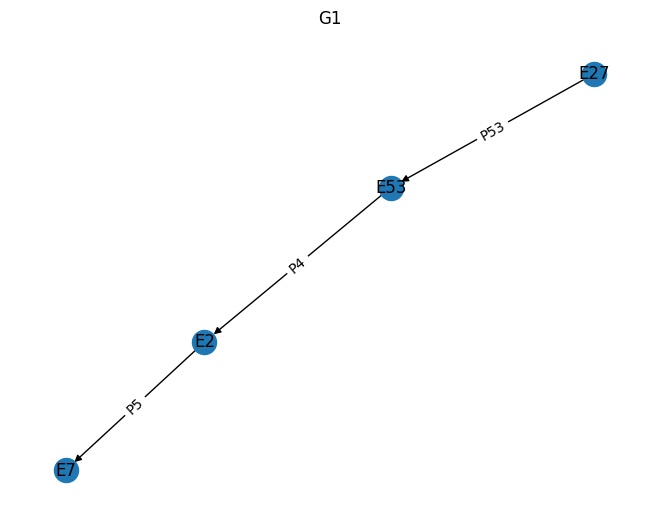

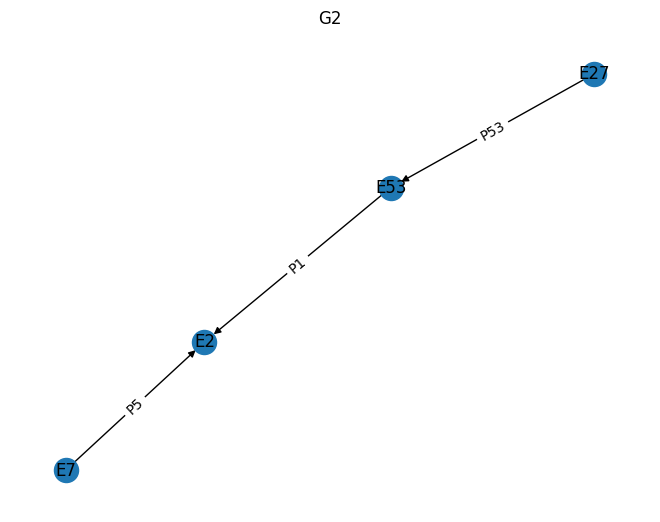

In [57]:
# Plot G1

p = nx.spring_layout(G1)

G1_labels_nodes = nx.get_node_attributes(G1, 'entity')
G1_labels_edges = nx.get_edge_attributes(G1, 'property')
nx.draw(G1, pos=p, labels = G1_labels_nodes, with_labels = True)
nx.draw_networkx_edge_labels(G1, pos=p, edge_labels = G1_labels_edges)
plt.title("G1")
plt.show()

# Plot G2

G2_labels_nodes = nx.get_node_attributes(G2, 'entity')
G2_labels_edges = nx.get_edge_attributes(G2, 'property')
nx.draw(G2, pos=p, labels = G2_labels_nodes, with_labels = True)
nx.draw_networkx_edge_labels(G2, pos=p, edge_labels = G2_labels_edges)
plt.title("G2")
plt.show()

In [58]:
# store
lg = []
dn = list()
ct = 0
for i in [G1, G2]:
	ct = ct + 1
	df_edges = nx.to_pandas_edgelist(i)
	df_nodes = []
	for a,b in i.nodes(data = True):
		df_nodes.append(
			{
				'node_id': a,
				'entity': b['entity']
			}
		)
	df_nodes=pd.DataFrame(df_nodes)
	# map
	id_to_entity = dict(zip(df_nodes['node_id'], df_nodes['entity']))
	df_subgraph = df_edges
	df_subgraph['source'] = df_edges['source'].map(id_to_entity)
	df_subgraph['target'] = df_edges['target'].map(id_to_entity)
	lg.append(df_subgraph)
	# keep the list of id nodes
	df_nodes['G'] = str(ct)
	dn.append(df_nodes)

df_G1 = lg[0]
df_G2 = lg[1]
dn_all = pd.concat([dn[0], dn[1]])
# clean
dn_all = dn_all.reset_index()
dn_all = dn_all.drop('index', axis = 1)

## Table views

G1:

In [59]:
print(df_G1.to_markdown())

|    | source   | target   | property   |
|---:|:---------|:---------|:-----------|
|  0 | E27      | E53      | P53        |
|  1 | E53      | E2       | P4         |
|  2 | E2       | E7       | P5         |


G2

In [60]:
print(df_G2.to_markdown())

|    | source   | target   | property   |
|---:|:---------|:---------|:-----------|
|  0 | E27      | E53      | P53        |
|  1 | E53      | E2       | P1         |
|  2 | E7       | E2       | P5         |


Common rows between G1 and G2

In [61]:
df_G1xG2 = df_G1.merge(df_G2, how='outer', indicator=True)
df_G1_only = df_G1xG2[df_G1xG2['_merge'] == 'left_only']
df_G2_only = df_G1xG2[df_G1xG2['_merge'] == 'right_only']
df_G_both = df_G1xG2[df_G1xG2['_merge'] == 'both']
print("\n")
print(df_G_both.to_markdown())



|    | source   | target   | property   | _merge   |
|---:|:---------|:---------|:-----------|:---------|
|  0 | E27      | E53      | P53        | both     |


In [62]:

# nodes with create 'match' column
dn_all_match = dn_all 
dn_all_match['match'] = dn_all_match["entity"] + '_' + dn_all_match["G"]
# add new node_id for the merge
dn_all_match['id'] = range(len(dn_all_match))
dn_all_match['id'] = dn_all_match['id']+1
# dn_all_match = dn_all_match.drop(['entity', 'G'], axis = 1)
dn_all_match = dn_all_match.drop(['entity'], axis = 1)
# print("\n")
# print(dn_all_match.to_markdown())

Match G1 and G2:

In [63]:
# edges, assign name of source graph, ids

df_G1_only = df_G1_only.assign(weight=1)
df_G2_only = df_G2_only.assign(weight=1)
df_G_both = df_G_both.assign(weight=2) # weight of two when shared
df_all = pd.concat([df_G1_only, df_G2_only, df_G_both])

df_all_match = df_all

# replace left_only and right_only with graph ids, raname
df_all_match['_merge'] = df_all_match['_merge'].replace(['left_only'], "1")
df_all_match['_merge'] = df_all_match['_merge'].replace(['right_only'], "2")
df_all_match = df_all_match.rename(columns={'_merge': 'G'})

df_all_match['G'] = df_all_match["G"].astype("str")
df_all_match['source_id'] = df_all_match["source"] + '_' + df_all_match["G"]
df_all_match['target_id'] = df_all_match["target"] + '_' + df_all_match["G"]

print(df_all_match.to_markdown())

|    | source   | target   | property   | G    |   weight | source_id   | target_id   |
|---:|:---------|:---------|:-----------|:-----|---------:|:------------|:------------|
|  1 | E53      | E2       | P4         | 1    |        1 | E53_1       | E2_1        |
|  2 | E2       | E7       | P5         | 1    |        1 | E2_1        | E7_1        |
|  3 | E53      | E2       | P1         | 2    |        1 | E53_2       | E2_2        |
|  4 | E7       | E2       | P5         | 2    |        1 | E7_2        | E2_2        |
|  0 | E27      | E53      | P53        | both |        2 | E27_both    | E53_both    |


Merge G1 and G2, identifying common and different subgraphs

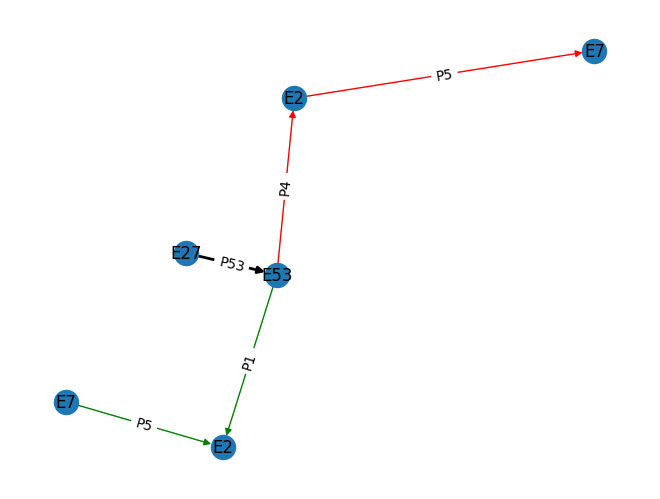

In [64]:
rows_to_duplicate = df_all_match[df_all_match['source_id'].str.contains('_both') | df_all_match['target_id'].str.contains('_both')]

# find indices of 'both' rows 
idx_both = df_all_match.index[df_all_match['source_id'].str.contains('_both') | df_all_match['target_id'].str.contains('_both')].tolist()
df_all_both = df_all_match
df_all_both['both'] = '0'
# search and replace
for both in idx_both:
	df_both_1 = df_all_both.loc[[both]]
	df_both_1['both'] = str(both) + "_1"
	df_both_1['source_id'] = df_both_1.iloc[0]['source_id'].replace('both', '1')
	df_both_1['target_id'] = df_both_1.iloc[0]['target_id'].replace('both', '1')
	df_both_2 = df_all_both.loc[[both]]
	df_both_2['source_id'] = df_both_2.iloc[0]['source_id'].replace('both', '2')
	df_both_2['target_id'] = df_both_2.iloc[0]['target_id'].replace('both', '2')
	df_both_2['both'] = str(both) + "_1"
	df_all_both = pd.concat([df_all_both, df_both_1], ignore_index=True)
	df_all_both = pd.concat([df_all_both, df_both_2], ignore_index=True)

# remove rows with 'both' patterns
idx_both = df_all_both.index[df_all_both['source_id'].str.contains('_both') | df_all_both['target_id'].str.contains('_both')].tolist()
df_all_both = df_all_both.drop(idx_both)

# print(df_all_both)

# %%
# common graph

df_both_source = df_all_both.merge(dn_all_match, right_on=['match'], left_on=['source_id'])
df_both_source = df_both_source.rename(columns={'id': 'id_source'})
df_both = df_both_source.merge(dn_all_match, right_on=['match'], left_on=['target_id'])
df_both = df_both.rename(columns={'id': 'id_target'})
# remove unuseful columns
df_both = df_both.drop(['G_y', 'G', 'match_x', 'match_y'], axis = 1)
df_both = df_both.rename(columns={'G_x': 'G'})

# print(df_both)

# %%
# replace node ids when they are 'both', stratified replacement based on 'both' tag

boths = df_both['both'].unique().tolist()
boths.remove('0')

for i in boths:
	# get the first one only, the second will be replaced
	both_row_to_keep  = df_both.index[df_both['both']==i].tolist()[0]
	id_source_to_keep = df_both.iloc[both_row_to_keep]['id_source']
	id_target_to_keep = df_both.iloc[both_row_to_keep]['id_target']
	# collect the ids of the second one
	both_row_to_change  = df_both.index[df_both['both']==i].tolist()[1]
	id_source_to_change = df_both.iloc[both_row_to_change]['id_source']
	id_target_to_change = df_both.iloc[both_row_to_change]['id_target']
	# replace ids 'to_change' by ids 'to_keep'
	# replace with the source
	df_both['id_source'] = df_both['id_source'].replace([id_source_to_change], id_source_to_keep)
	df_both['id_target'] = df_both['id_target'].replace([id_source_to_change], id_source_to_keep)
	# replace with the target
	df_both['id_source'] = df_both['id_source'].replace([id_target_to_change], id_target_to_keep)
	df_both['id_target'] = df_both['id_target'].replace([id_target_to_change], id_target_to_keep)

# print(df_both)

# %%
# plot the final graph

# colors
conditions = [
    (df_both['G'] == '1'),
    (df_both['G'] == '2')]
choices = ['red', 'green']
df_both['color'] = np.select(conditions, choices, default='black')

# load with attributes
G = nx.from_pandas_edgelist(df_both, 'id_source', 'id_target', True, create_using=nx.DiGraph())
for i in G.nodes():
     G.nodes[i]['entity'] = dn_all[dn_all['id']==i]['entity'].item()

edges = G.edges()
colors = [G[u][v]['color'] for u,v in edges]
weights = [G[u][v]['weight'] for u,v in edges]

p = nx.spring_layout(G)
G_labels_nodes = nx.get_node_attributes(G, 'entity')
G_labels_edges = nx.get_edge_attributes(G, 'property')
nx.draw(G, pos=p, labels = G_labels_nodes, with_labels = True, edge_color=colors, width=weights)
nx.draw_networkx_edge_labels(G, pos=p, edge_labels = G_labels_edges)
plt.show()